# Testing out a GridSearch Crossvalidated Random Forest model to predict COVID death

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
ip= pd.read_csv("Synthea_conditions.csv")
ip.head()

,PID,age,sex,Status,futime,ethnicity_fac,allergy,over_60,death_status,Allergic_rhinitis,...,High_cholesterol,Hypertension,Kidney_urinary_etc,Mental,Metabolic,Neuro,Obesity,Orthopaedic_disorder,Sinusitis,Smoking
0,P7023,11.479808,1,0,366,White,0,Under 60,Alive,0,...,0,0,0,0,0,0,0,0,0,0
1,P5806,34.513347,0,0,366,Hispanic,1,Under 60,Alive,1,...,0,0,0,0,0,0,1,0,0,0
2,P6033,28.172485,1,0,366,White,0,Under 60,Alive,0,...,0,1,0,0,0,0,0,0,0,0
3,P0590,25.943874,0,1,286,White,0,Under 60,Died,0,...,0,0,0,0,0,0,1,0,1,0
4,P2821,66.600958,1,0,366,White,1,Over 60,Alive,1,...,1,1,0,0,0,0,1,0,1,0


In [47]:
ip= ip.drop(['PID','death_status','futime'], axis=1)
ip.head()
ip.isnull().sum()

age                     0
sex                     0
Status                  0
ethnicity_fac           0
allergy                 0
over_60                 0
Allergic_rhinitis       0
Alzheimers_disease      0
Anemia                  0
Appendicitis            0
Arthritis               0
Asthma_bronchitis       0
Cancer                  0
Cardiac                 0
Chronic_pain            0
Chronic_respiratory     0
Dermatitis              0
Diabetes                0
Drug_abuse              0
ENT                     0
High_cholesterol        0
Hypertension            0
Kidney_urinary_etc      0
Mental                  0
Metabolic               0
Neuro                   0
Obesity                 0
Orthopaedic_disorder    0
Sinusitis               0
Smoking                 0
dtype: int64

In [48]:
ip.dtypes

age                     float64
sex                       int64
Status                    int64
ethnicity_fac            object
allergy                   int64
over_60                  object
Allergic_rhinitis         int64
Alzheimers_disease        int64
Anemia                    int64
Appendicitis              int64
Arthritis                 int64
Asthma_bronchitis         int64
Cancer                    int64
Cardiac                   int64
Chronic_pain              int64
Chronic_respiratory       int64
Dermatitis                int64
Diabetes                  int64
Drug_abuse                int64
ENT                       int64
High_cholesterol          int64
Hypertension              int64
Kidney_urinary_etc        int64
Mental                    int64
Metabolic                 int64
Neuro                     int64
Obesity                   int64
Orthopaedic_disorder      int64
Sinusitis                 int64
Smoking                   int64
dtype: object

In [49]:
print(ip.ethnicity_fac.value_counts())
print(ip.over_60.value_counts())

White       6788
Hispanic     789
Black        662
Asian        584
Other        217
Name: ethnicity_fac, dtype: int64
Under 60    7009
Over 60     2031
Name: over_60, dtype: int64


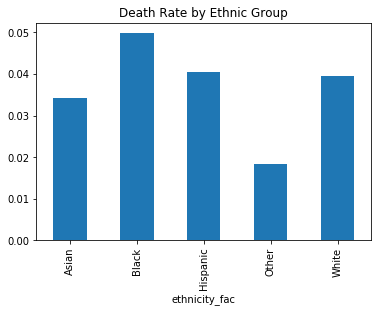

In [58]:
byethnic= ip.groupby('ethnicity_fac')['Status'].mean().plot(kind= "bar", title= "Death Rate by Ethnic Group")

In [59]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

scaler= StandardScaler()
enc = LabelEncoder()

# Apply the encoding 
ip['ethnicity_cat'] = enc.fit_transform(ip['ethnicity_fac'])
ip.groupby(['ethnicity_cat','ethnicity_fac'])['age'].count()

ethnicity_cat  ethnicity_fac
0              Asian             584
1              Black             662
2              Hispanic          789
3              Other             217
4              White            6788
Name: age, dtype: int64

In [60]:
ip['over_60']= enc.fit_transform(ip['over_60'])
ethnic = pd.get_dummies(ip['ethnicity_cat'], drop_first= True, prefix="ethnic")

ip= pd.concat([ip, ethnic], axis= 1)
ip.head()

,age,sex,Status,ethnicity_fac,allergy,over_60,Allergic_rhinitis,Alzheimers_disease,Anemia,Appendicitis,...,Neuro,Obesity,Orthopaedic_disorder,Sinusitis,Smoking,ethnicity_cat,ethnic_1,ethnic_2,ethnic_3,ethnic_4
0,11.479808,1,0,White,0,1,0,0,0,0,...,0,0,0,0,0,4,0,0,0,1
1,34.513347,0,0,Hispanic,1,1,1,0,1,0,...,0,1,0,0,0,2,0,1,0,0
2,28.172485,1,0,White,0,1,0,0,0,0,...,0,0,0,0,0,4,0,0,0,1
3,25.943874,0,1,White,0,1,0,0,0,0,...,0,1,0,1,0,4,0,0,0,1
4,66.600958,1,0,White,1,0,1,0,1,0,...,0,1,0,1,0,4,0,0,0,1


In [61]:
ip[['age']]= scaler.fit_transform(ip[['age']])
ip= ip.drop(['ethnicity_fac','ethnicity_cat'], axis= 1)
ip.head()

,age,sex,Status,allergy,over_60,Allergic_rhinitis,Alzheimers_disease,Anemia,Appendicitis,Arthritis,...,Metabolic,Neuro,Obesity,Orthopaedic_disorder,Sinusitis,Smoking,ethnic_1,ethnic_2,ethnic_3,ethnic_4
0,-1.245767,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.269460,0,0,1,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,-0.538226,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.632688,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,1.090616,1,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


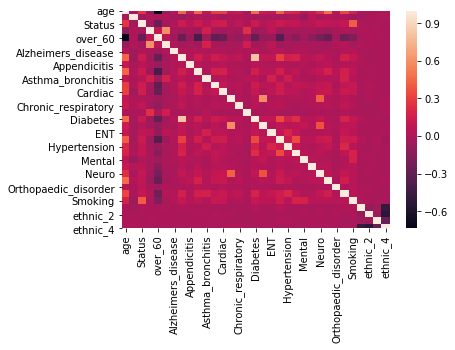

In [62]:
sns.heatmap(ip.corr())

age                     0.264297
sex                    -0.037246
Status                  1.000000
allergy                -0.026701
over_60                -0.267810
Allergic_rhinitis      -0.034529
Alzheimers_disease      0.015499
Anemia                  0.133718
Appendicitis            0.058742
Arthritis               0.128038
Asthma_bronchitis       0.048601
Cancer                  0.135346
Cardiac                 0.152967
Chronic_pain            0.016184
Chronic_respiratory     0.084003
Dermatitis              0.007930
Diabetes                0.125343
Drug_abuse              0.023803
ENT                     0.079795
High_cholesterol        0.129457
Hypertension            0.096030
Kidney_urinary_etc      0.095781
Mental                  0.027721
Metabolic               0.058116
Neuro                   0.104225
Obesity                 0.080639
Orthopaedic_disorder    0.067390
Sinusitis               0.103421
Smoking                 0.405577
ethnic_1                0.014949
ethnic_2  

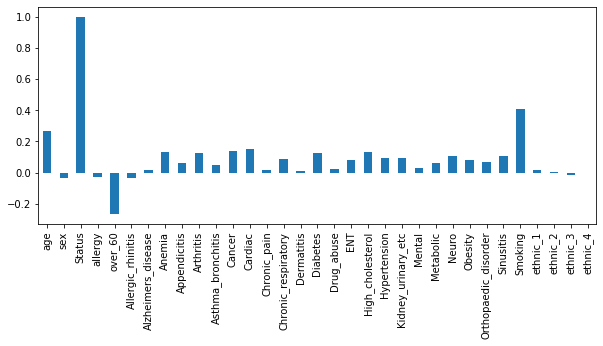

In [43]:
corvec= ip.corr().Status
corvec.shape
print(corvec)
corvec.plot(kind="bar", figsize= [10,4])


In [63]:
from sklearn.model_selection import train_test_split

X= ip.drop('Status', axis= 1)
y= ip.Status

X_train, X_test, y_train, y_test = train_test_split(X, y,   stratify=y)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parameter grid
param_grid = {'max_depth': [2, 4, 8, 15], 'max_features': ['auto','sqrt'],
             'n_estimators' : [100, 500, 1000]} 

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring= 'roc_auc',
    n_jobs=4,
    cv=5,
    refit=True, return_train_score=True)
print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True, scoring='roc_auc')


In [67]:
grid_rf_class.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True, scoring='roc_auc')

In [69]:
# Read the cv_results property into a dataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ['params']]

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1 ]
print(best_row)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13        1.41335      0.015348         0.081938        0.001013   

   param_max_depth param_max_features param_n_estimators  \
13               8               auto                500   

                                               params  split0_test_score  \
13  {'max_depth': 8, 'max_features': 'auto', 'n_es...            0.86353   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
13           0.915377  ...         0.890877        0.025003                1   

    split0_train_score  split1_train_score  split2_train_score  \
13            0.971314            0.963805            0.966395   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
13            0.968328            0.964803          0.966929         0.002674  

[1 rows x 23 columns]


In [72]:
from sklearn.metrics import classification_report, roc_auc_score

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix 
print("Confusion Matrix \n", classification_report(y_test, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

[0 0 0 0 0]
Confusion Matrix 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2171
           1       0.93      0.16      0.27        89

    accuracy                           0.97      2260
   macro avg       0.95      0.58      0.63      2260
weighted avg       0.97      0.97      0.95      2260

ROC-AUC Score 
 0.8773153778872678


In [80]:
featureImp= []
for feat, importance in zip(X_train.columns, grid_rf_class.best_estimator_.feature_importances_):  
    temp = [feat, importance*100]
    featureImp.append(temp)

fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
fT_df=  fT_df.sort_values('Importance', ascending = False)
print(fT_df)

                 Feature  Importance
0                    age   26.560967
27               Smoking   18.195159
3                over_60   13.462160
11               Cardiac    3.082989
6                 Anemia    2.937688
15              Diabetes    2.796042
19          Hypertension    2.771943
18      High_cholesterol    2.752744
10                Cancer    2.551964
24               Obesity    2.176322
26             Sinusitis    2.168214
8              Arthritis    2.123850
1                    sex    1.875542
23                 Neuro    1.625834
17                   ENT    1.339280
13   Chronic_respiratory    1.333523
31              ethnic_4    1.318663
7           Appendicitis    1.199748
9      Asthma_bronchitis    1.102824
20    Kidney_urinary_etc    0.914952
16            Drug_abuse    0.905353
28              ethnic_1    0.894456
2                allergy    0.857308
21                Mental    0.841979
4      Allergic_rhinitis    0.724648
29              ethnic_2    0.716521
1

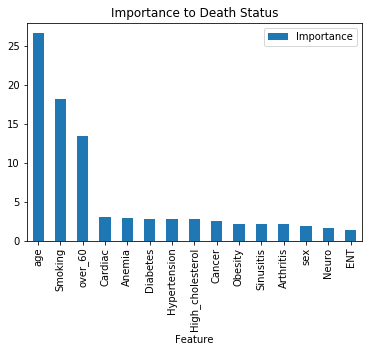

In [83]:
fT_df.iloc[0:15].set_index('Feature').plot(kind= "bar", title= "Importance to Death Status")
